In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D1-Cristina/S4/Office_Cristina-S4.csv",index_col='timestamp')

In [4]:
train_data = df.iloc[:7920]
test_data = df.iloc[7920:]

In [5]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data),24):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i:i+24, 0])
        #print(y)
   
    
    return [X, y]

In [6]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [7]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [8]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [9]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [10]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (329, 24, 1)
y_train.shape =  (329, 24)
X_test.shape =  (29, 24, 1)
y_test.shape =  (29, 24)


In [11]:
import tensorflow as tf
import sklearn.preprocessing
from keras.layers import Dense,Dropout,LSTM,Bidirectional
from keras.models import Sequential

In [12]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(24, activation='tanh', return_sequences=False), input_shape=(24,1)))
#model.add(Bidirectional(LSTM(24, activation='tanh')))
#model.add(Dropout(0.5))
model.add(Dense(24))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 48)               4992      
 l)                                                              
                                                                 
 dense (Dense)               (None, 24)                1176      
                                                                 
Total params: 6,168
Trainable params: 6,168
Non-trainable params: 0
_________________________________________________________________


In [13]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="MSE")

In [14]:
history= model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
3/3 [==============================] - 4s 21ms/step - loss: 12.3795
Epoch 2/300
3/3 [==============================] - 0s 18ms/step - loss: 11.8331
Epoch 3/300
3/3 [==============================] - 0s 19ms/step - loss: 11.3062
Epoch 4/300
3/3 [==============================] - 0s 22ms/step - loss: 10.7792
Epoch 5/300
3/3 [==============================] - 0s 19ms/step - loss: 10.2604
Epoch 6/300
3/3 [==============================] - 0s 18ms/step - loss: 9.7375
Epoch 7/300
3/3 [==============================] - 0s 17ms/step - loss: 9.2052
Epoch 8/300
3/3 [==============================] - 0s 17ms/step - loss: 8.6757
Epoch 9/300
3/3 [==============================] - 0s 17ms/step - loss: 8.1455
Epoch 10/300
3/3 [==============================] - 0s 19ms/step - loss: 7.6138
Epoch 11/300
3/3 [==============================] - 0s 17ms/step - loss: 7.0821
Epoch 12/300
3/3 [==============================] - 0s 18ms/step - loss: 6.5544
Epoch 13/300
3/3 [==========================

In [15]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt

In [17]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))
mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)
mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

print('RMSE for BiLSTM Model for training is:',rmse_train)
print('RMSE for BiLSTM Model for testing is:',rmse_test)
print('MAE for BiLSTM Model for training is:',mae_train)
print('MAE for BiLSTM Model for testing is:',mae_test)
print('MAPE for BiLSTM Model for training is:',mape_train)
print('MAPE for BiLSTM Model for testing is:',mape_test)

RMSE for BiLSTM Model for training is: 0.8043106184786957
RMSE for BiLSTM Model for testing is: 0.8341818012865871
MAE for BiLSTM Model for training is: 0.6191738862120201
MAE for BiLSTM Model for testing is: 0.6550106745374878
MAPE for BiLSTM Model for training is: 0.22257667370929268
MAPE for BiLSTM Model for testing is: 0.22741141417063804


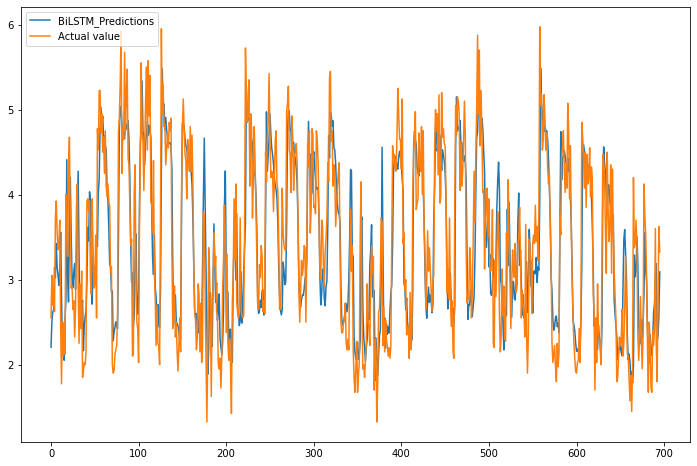

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='BiLSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [ ]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([2.54999995]), array([2.2049334], dtype=float32))

In [ ]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([0.34506655]), array([0.54215836]), array([0.083529]), array([0.2504375]), array([-0.51780367]), array([0.70379472]), array([0.50041318]), array([0.40259957]), array([0.3002317]), array([0.49266195]), array([0.57043242]), array([-1.08327484]), array([-1.01023018]), array([0.29644585]), array([-0.26454401]), array([0.4481895]), array([-0.40973043]), array([1.23705721]), array([-0.83611417]), array([0.26527452]), array([1.58820224]), array([0.99695826]), array([-0.50186372]), array([-0.65235925]), array([-0.10163808]), array([-0.25819278]), array([-0.34630752]), array([-0.86146998]), array([-0.23527741]), array([0.50778008]), array([0.3184576]), array([-1.3254385]), array([-1.05022335]), array([0.48950648]), array([-0.48667169]), array([0.462641]), array([-0.90931666]), array([-0.23915839]), array([-0.43578363]), array([-0.56855655]), array([-0.49458933]), array([0.94943976]), array([0.33380771]), array([0.34454894]), array([-0.1074841]), array([-0.88394332]), array([-0.2091155]),

In [ ]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([2.21742666]), array([-1.47656703]))

In [ ]:
max(d1)-min(d1)

array([3.69399369])

In [ ]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [ ]:
len(neg),len(pos)

(357, 339)